# **ReadMe:**

Note: Look at each cell for more instruction

1) First, upload the _train.csv_ and _test.csv_ files which will be used for the training and testing pupose of various algorithms.

---
2) At the start, code of the pre-processing of the data and the divison of the data according to the class it belongs to is present, which can be run for future requirements.

---
3) Class of _Bernoulli Naive Bayes_ which is developed from scratch and can be  used for the k-fold, and for the training set accuracy calculation.

---
4) Various Sci-Kit learn Algorithms are implemented, it will generate the accuracy of the test set which has been divided using the _train_test_split_ of Sci-Kit Learn.

---
5) Various Feature Construction methods are implemented such as Bit Vectorizer, Term Frequency Vectorizer, and TF-IDF; and can be used for experiment purpose.

---
6) K-fold of all the Sci-Kit Models are performed using the KFold of Sklearn.

---

This is the main python file for Mini Project-2 of ECSE-551: Machine Learning for Engineers
- In this code, Bernoulli Naive Bayes is implemented and also other models are tested using the SciKit Learn.

Project made by:     
1. Aishwarya Ramamurthy (ID: 260963956)
2. Alok Patel (ID: 260954024)
3. Katyayani Prakash (ID: 260964511)


Uploading the data files for training and testing purpose 
- Just upload the train.csv and test.csv files


In [ ]:
# Uploading the data files for training and testing purpose #

from google.colab import files 
import pandas as pd
import io
import sklearn

print("Upload train.csv file from your local drive")   
file = files.upload()                                                
df = pd.read_csv(io.BytesIO(file['train.csv']),encoding='unicode_escape') 

print("Upload test.csv file from your local drive")   
file = files.upload()                                                
df_test = pd.read_csv(io.BytesIO(file['test.csv']),encoding='unicode_escape') 

Upload train.csv file from your local drive


Saving train.csv to train.csv
Upload test.csv file from your local drive


Saving test.csv to test.csv


In [ ]:
print("A glimpse into train.csv file\n")
df.head()

A glimpse into train.csv file



,body,subreddit
0,The situation looks gruesome considering that ...,science
1,Biofuels are good and all but soil degradation...,science
2,"We touched in this in my zoology lectures, and...",science
3,Counter points:\n\nhttps://www.npr.org/2019/07...,science
4,"I get it, Russia's international reputation is...",science


In [ ]:
print("Unique class labels in this file are: ",df['subreddit'].unique())

Unique class labels in this file are:  ['science' 'laptop' 'samsung' 'tennis' 'anime']


 Dividing data according to class type

In [ ]:
# Dividing data according to class type

science_thread = df[0:399]
print(science_thread)

laptop_thread = df[399:799]
print(laptop_thread)

samsung_thread = df[799:1199]
print(samsung_thread)

tennis_thread = df[1199:1599]
print(tennis_thread)

anime_thread = df[1599:2000]
print(anime_thread)

                                                  body subreddit
0    The situation looks gruesome considering that ...   science
1    Biofuels are good and all but soil degradation...   science
2    We touched in this in my zoology lectures, and...   science
3    Counter points:\n\nhttps://www.npr.org/2019/07...   science
4    I get it, Russia's international reputation is...   science
..                                                 ...       ...
394  By late summer 2020, the resurgence of COVID-1...   science
395  i admit to not following very closely, but i d...   science
396  When billions of climate refugees start appear...   science
397  That doesn't mean it was necessary to execute ...   science
398  The real shame in all this is that research in...   science

[399 rows x 2 columns]
                                                  body subreddit
399  Hello,\n\nAre you both looking for this? \n\n[...    laptop
400  Hello everybody, greetings. \n\nI am looking f...    laptop
4

In [ ]:
# Dividing the data into body and its classification type

#print(df)
Comment = df['body']
Subreddit = df['subreddit']
#print(Comment)
#print(Subreddit)

test_id = df_test['id']
test_Comment = df_test['body']
#print(test_id)
#print(test_Comment)

Preprocessing and Characteristics of the Data

In [ ]:
# Preprocessing and Characteristics of the Data

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

import numpy as np
import matplotlib.pyplot as plt

#Don't use the STOP Words, as there are several problems in it. {Look at the 6.2 Feature extraction of the scikit learn}
stopage_words = text.ENGLISH_STOP_WORDS

#binary=True is used for discrete probablistic models tht mode binary events rather than integer counts
#max_features=3000 will be considered, it will keep the top 3000 highest frequency words
#In stop_words = stopage_words for removal.
vectorizer = CountVectorizer(stop_words = None, max_features = None)           
#print(vectorizer)
vectors_train = vectorizer.fit_transform(Comment)
features = vectorizer.get_feature_names()
print("Features: \n",features)                          # Feature items list is printed
print("\nLength of features = ",len(features))          #Length of the feature list
#print(vectors_train)
#print(vectors_train.todense())                         #One shot representation

print("\n\n")
'''
plt.figure(figsize=(5,4))
fig = df.groupby('subreddit').body.count().plot.bar() #Bar graph stored in the object
for b in fig.patches:
  plt.text(b.get_x()+b.get_width()/5,b.get_height(),int(b.get_height()),va='bottom')
plt.show()
'''

Features: 
 ['00', '000', '000inr', '000n', '001', '007', '00am', '00pm', '01', '01004', '01110', '012', '019', '01k009en', '02', '020', '02088', '021', '0261', '03', '03305e43', '0499', '04f6adee', '05', '062', '066', '07', '081', '09', '097in', '099in', '0c04786', '0c4a743960cc', '10', '100', '1000', '100000', '1002', '1003', '10051', '100567028', '100579313', '100579449', '1005g1', '100gb', '100k', '100v', '100x', '101', '1012', '10151', '1016', '1017', '101858977111', '10205989', '1021', '1027', '1029864920981110', '10300h', '1035g1', '1047', '1050', '1050ee', '1050ti', '10510u', '1056', '1060', '1065g7', '107', '1070', '10750h', '1080', '1080p', '10870', '10875h', '108mp', '1093', '10980hk', '10am', '10k', '10plus', '10pm', '10s', '10sfk', '10th', '10tk', '10ux', '10x', '10x3', '11', '110', '1100', '110k', '111', '1115g4', '112153', '1126', '113476', '1135g7', '114307', '114446', '115w', '1165g7', '116700', '116a', '117085', '1172', '1177', '118', '1183', '1186', '11am', '11ax', '

"\nplt.figure(figsize=(5,4))\nfig = df.groupby('subreddit').body.count().plot.bar() #Bar graph stored in the object\nfor b in fig.patches:\n  plt.text(b.get_x()+b.get_width()/5,b.get_height(),int(b.get_height()),va='bottom')\nplt.show()\n"

# Bernoulli Naive Bayes


 Class of the Bernoulli Naive Bayes from Scratch
 - Need to run to perform the Naive Bayes for the training set and for the k-fold.
 

In [ ]:
## Class of the Bernoulli Naive Bayes from Scratch ##

import numpy as np

class BernoulliNaive:
  def __init__(self, Comment, science_thread, laptop_thread, samsung_thread, tennis_thread, anime_thread):
    self.Comment = Comment
    self.science_thread = science_thread                 
    self.laptop_thread = laptop_thread
    self.samsung_thread = samsung_thread
    self.tennis_thread = tennis_thread
    self.anime_thread = anime_thread

  #Calculating the theta vector according the bit matrix for a particular class#
  def theta(self, X_science, X_laptop, X_samsung, X_tennis, X_anime):
    class_count = np.array([len(self.science_thread), len(self.laptop_thread), len(self.samsung_thread), len(self.tennis_thread), len(self.anime_thread)])
    theta_k = class_count/len(self.Comment)
    #Laplace Smoothing also applied here
    theta_jk = np.array((np.sum(X_science, axis=0)+1)/(2+class_count[0]))
    theta_jk = np.vstack([theta_jk, (np.sum(X_laptop, axis=0)+1)/(2+class_count[1]), (np.sum(X_samsung, axis=0)+1)/(2+class_count[2]), (np.sum(X_tennis, axis=0)+1)/(2+class_count[3]), (np.sum(X_anime, axis=0)+1)/(2+class_count[4])])
    return theta_k, theta_jk

  # Class Prob. Function (All Deltas) #
  #This X will be the bit vector for each traning ex. 
  def ClassProbability(self, X, theta_k, theta_jk):
    delta = []
    for i in range(5):        #For each class 
      prob = 1
      for j in range(3000):
        prob = prob * (pow(theta_jk[i, j],X[0,j]) * pow((1-theta_jk[i, j]),(1-X[0,j])))
      
      prob = theta_k[i] * prob
      delta.append(prob)      #Appending all the probability values
    return np.log(delta)      #Returing delta by calculating the log of the probabilites. 

  # Predict function #
  def predict(self, delta):
    classes = ['science', 'laptop', 'samsung', 'tennis', 'anime']
    a = max(delta)                    #Selecting the maximum delta value 
    for i in range(len(delta)):
      if a == delta[i]:
        class_no = i                 #Selecting the index of the best probability

    if class_no == 0:
      return classes[0]
    elif class_no == 1:
      return classes[1]
    elif class_no == 2:
      return classes[2]
    elif class_no == 3:
      return classes[3]
    elif class_no == 4:
      return classes[4]  
    else:
      return None

Main File for the Bernoulli Naive Bayes
- It will create an object of Naive Bayes class and then test the algorithm on whole training dataset.

In [ ]:
## Main File for the Bernoulli Naive Bayes [For whole training Set] ##

import time
from sklearn.feature_extraction.text import CountVectorizer

time_b = time.time()
#Vectorizing the data particularly for Bernoulli Naive Bayes
vectorizer = CountVectorizer(max_features = 3000, binary = True)
X = vectorizer.fit_transform(Comment)
X_all_class = X.todense()  

#Dividing Bit Vectors according to class type 
X_science = X_all_class[0:399]
X_laptop = X_all_class[399:799]
X_samsung = X_all_class[799:1199]
X_tennis = X_all_class[1199:1599]
X_anime = X_all_class[1599:2000]

#All comments according to the class type 
science_thread = df[0:399]
laptop_thread = df[399:799]
samsung_thread = df[799:1199]
tennis_thread = df[1199:1599]
anime_thread = df[1599:2000]

#Making the object of the class.
'''
Here input to the class will be the Comment and subreddit comments used for the training so 6 in total dataframes,
one will be whole training data set and 5 other each class dataframes.
'''
bnb = BernoulliNaive(Comment, science_thread, laptop_thread, samsung_thread, tennis_thread, anime_thread)

# Calculating the theta vector #
'''
- Just the bit vectorized matrix of the all the training samples of a particular class is 
 needed to be entered here, whether k-fold or not. 
- This theta's are stored using the training data and later will be used for probability calculations for the test data.
- Note: Don't use the theta_jk and theta_k here for return because it may change the global variable.
'''
thetak, thetajk = bnb.theta(X_science, X_laptop, X_samsung, X_tennis, X_anime)

# Testing Predict for the training data set #
'''
Input will be to add the vectroized x of the test data that is needed to be tested, and along with the theta vectors that are obtained.
'''
Predict = []
for i in range(len(Comment)):
  DEL = bnb.ClassProbability(X_all_class[i], thetak, thetajk)
  y = bnb.predict(DEL)
  Predict.append(y)

print(Predict)

# Calculate Accurracy of Naive Bayes on the Training data set #
accuracy = (Predict == Subreddit).mean()
print(accuracy)
time_e = time.time()
print('Time elapsed:',time_e-time_b,'s')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


['science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'samsung', 'science', 'science', 'science', 'science', 'tennis', 'science', 'science', 'science', 'tennis', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'tennis', 'tennis', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'tennis', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'tennis', 'samsung', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'tennis', 'science', 'science', 'science', 'science', 'science', 'tennis', 'science', 'science', 'science', 'science', 'samsung', 'science', 'science', 'science', 'science', 'tennis', 'science', 'science', 'science', 'samsung', 'science', 'science', 'science', 'science', 'science', 'tennis

K-fold for Bernoulli Naive Bayes
- Using Stratified Kfold, the data is separated into validation and testing set, without shuffling the data among different classes, and will select data from all the class type.

In [ ]:
# K-fold for Bernoulli Naive Bayes #
'''
Notes:
- When k-fold is applied, then for the test set a particular test data is selected by it.    
- So, we need to apply Stratified Kfold
'''
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer

time_b=time.time()
# Vectorizing the data for Bernoulli Naive Bayes
vectorizer = CountVectorizer(max_features = 3000, binary = True)
X = vectorizer.fit_transform(Comment)
X_all_class = X.todense() 

# Defining k-fold object for Naive Bayes
skf =StratifiedKFold(n_splits = 10)
#index = skf.split(Comment, Subreddit)
index = skf.split(X_all_class, Subreddit)

# Function fork-fold accuracy calculations
def kfoldNaive(X_Comment_train, X_comment_test, X_train, X_test, Y_train, Y_test):
  #Dividing Bit Vecotrs according to class type for training Data
  X_sci_tr = X_train[0:360]
  X_lap_tr = X_all_class[360:720]
  X_sam_tr = X_all_class[720:1080]
  X_ten_tr = X_all_class[1080:1440]
  X_ane_tr = X_all_class[1440:1800]

  #All comments according to the class type for the training comments
  science_thread = X_Comment_train[0:360]
  laptop_thread = X_Comment_train[360:720]
  samsung_thread = X_Comment_train[720:1080]
  tennis_thread = X_Comment_train[1080:1440]
  anime_thread = X_Comment_train[1440:1800]

  bnb = BernoulliNaive(X_Comment_train, science_thread, laptop_thread, samsung_thread, tennis_thread, anime_thread)
  thetak, thetajk = bnb.theta(X_sci_tr,  X_lap_tr, X_sam_tr, X_ten_tr, X_ane_tr)

  Predict = []
  for i in range(len(X_comment_test)):
    DEL = bnb.ClassProbability(X_test[i], thetak, thetajk)
    y = bnb.predict(DEL)
    Predict.append(y)
  print(Predict)

  # Cal. Accurracy of the Naive Bayes on the Training data set #
  accuracy = (Predict == Y_test).mean()
  print("Accuracy of this fold is: ",accuracy)

# Generating the accuracy for each set.
for t, te in index:
  #X_train, X_test = Comment[t], Comment[te]
  X_train, X_test = X_all_class[t], X_all_class[te]
  X_Comment_train, X_comment_test = Comment[t], Comment[te]
  Y_train, Y_test = Subreddit[t], Subreddit[te]
  kfoldNaive(X_Comment_train, X_comment_test, X_train, X_test, Y_train, Y_test)

time_e = time.time()
print('Time elapsed:',time_e-time_b,'s')

['tennis', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'tennis', 'science', 'science', 'science', 'science', 'tennis', 'anime', 'science', 'science', 'tennis', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'tennis', 'tennis', 'science', 'samsung', 'science', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'samsung', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'samsung', 'laptop', 'samsung', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'tennis', 'samsung', 'samsung', 'samsung', 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


['science', 'science', 'anime', 'science', 'tennis', 'tennis', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'anime', 'tennis', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'science', 'tennis', 'science', 'anime', 'tennis', 'science', 'science', 'science', 'science', 'tennis', 'science', 'science', 'tennis', 'science', 'tennis', 'science', 'science', 'tennis', 'laptop', 'laptop', 'laptop', 'samsung', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'laptop', 'samsung', 'tennis', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'samsung', 'tennis

Classification Accuracy vs Vocabulary Size plot

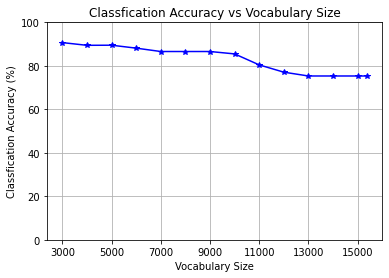

In [ ]:
#Classification Accuracy vs Vocabulary Size plot
import numpy as np
import matplotlib.pyplot as plt
Vocab_Size = np.array([3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,15365]); 
Class_Acc=np.array([0.9069534767383692,0.894447223611806,0.8949474737368684,0.8814407203601801,0.8659329664832416,0.8659329664832416,
                    0.8659329664832416,0.8549274637318659,0.8044022011005503,0.7708854427213607,0.753376688344172,0.753376688344172,0.753376688344172,0.753376688344172])*100;
plt.plot(Vocab_Size,Class_Acc,'-*b');plt.xlabel('Vocabulary Size');plt.ylabel('Classfication Accuracy (%)');plt.grid(True);
plt.title('Classfication Accuracy vs Vocabulary Size');plt.xticks([3000,5000,7000,9000,11000,13000,15000]);plt.ylim([0,100]);

Decision Tree Classification
- It also includes some pre-processing part

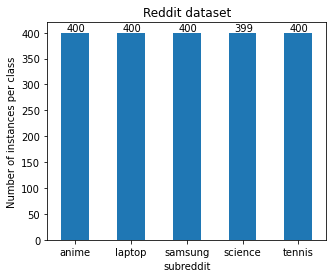

              precision    recall  f1-score   support

       anime       0.78      0.76      0.77       104
      laptop       0.84      0.78      0.81       103
     samsung       0.75      0.71      0.73        91
     science       0.68      0.67      0.68       104
      tennis       0.67      0.78      0.72        98

    accuracy                           0.74       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.74      0.74      0.74       500

[[79  1  1 12 11]
 [ 5 80  8  4  6]
 [ 5  7 65  6  8]
 [ 9  2 10 70 13]
 [ 3  5  3 11 76]]

 500
Time elapsed: 0.40233349800109863 s


In [ ]:
# Decision Tree Classification ##

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
       
#print(df_cc)
# df.head()
plt.figure(figsize=(5,4))
fig=df.groupby('subreddit').body.count().plot.bar() #storing the bar graph as an object
# df.groupby('subreddit').count()
#For loop to annotate the bar graph with corresponding y axis values
for b in fig.patches:
       plt.text(b.get_x()+b.get_width()/5,b.get_height(),int(b.get_height()),va='bottom')
plt.ylabel('Number of instances per class');plt.title('Reddit dataset');plt.xticks(rotation='horizontal');plt.show()
time_b=time.time() 
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(df['body'], df['subreddit'],random_state=0)
vect = CountVectorizer(binary=True)         #Binary representation of input text data
X_train_dt = vect.fit_transform(X_train_dt)       #Fit data and transform
#print("X_train_dt: \n",X_train_dt.todense())
X_test_dt = vect.transform(X_test_dt)             #Standardize data by Centering and Scaling
#print(X_test)
dt = DecisionTreeClassifier()
dt.fit(X_train_dt, y_train_dt)                    #Model Fit function
y_pred_dt = dt.predict(X_test_dt)                 #Predict function
print(classification_report(y_test_dt, y_pred_dt))
print(confusion_matrix(y_test_dt, y_pred_dt))
#len(vect.get_feature_names())
print('\n',np.size(y_pred_dt))
time_e = time.time()
print('Time elapsed:',time_e-time_b,'s')

Dividing the data into four training and test input and outputs and vectorizing it

In [ ]:
## Dividing the data into four train and test input and outputs and vectorizing it ##

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Comment,Subreddit,test_size = 0.25 ,train_size = None,shuffle = True)

#print(X_train)
#print(Y_train)
#print(X_test)

vect = CountVectorizer(encoding='unicode_escape')
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

print("X_train: \n",X_train.todense())

print("\nX_test: \n",X_test.todense())

#Input from test.csv file
test_X = vect.transform(test_Comment)
#print(test_X)

'''
vectors_train = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()
print(features)               # Feautre items list is printed
print(len(features))
''' 

X_train: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

X_test: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


'\nvectors_train = vectorizer.fit_transform(X_train)\nfeatures = vectorizer.get_feature_names()\nprint(features)               # Feautre items list is printed\nprint(len(features))\n'

Applying TF-IDF to data
- Can be used for feature selection for all the models.

In [ ]:
## Applying TF-IDF to data ##

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

dataset = {"I enjoy reading about Machine Learning and Machine Learning is my PhD subject",
    "I would enjoy a walk in the park",
    "I was reading in the library"}

#def tokens(x):
  #return x.split(',')

#The following dataset split has been done again in order to avoid confusion with X_train variable which is already vectorized.
X_train_t, X_test_t, Y_train_t, Y_test_t = train_test_split(Comment,Subreddit,test_size = 0.25 ,train_size = None,shuffle = True)
tf_idf_vectorizer = TfidfVectorizer(encoding='unicode_escape', max_features=3000)

vectors_train_idf = tf_idf_vectorizer.fit_transform(X_train_t)
X_tfidf = vectors_train_idf.todense()
print(X_tfidf)
# #vectors_test_idf = tf_idf_vectorizer.transform(X_test)
# print(vectors_train_idf.todense())
# #print(vectors_train_idf.toarray())

# import pandas as pd
# from google.colab import files

# df_tfidf = pd.DataFrame(vectors_train_idf.todense())       #Storing the predicted results in the panda dataframe
# print(df_tfidf)  

# df_tfidf.to_csv('tfidf.csv')                                           #Storing panda dataframe into .csv file
# files.download('tfidf.csv')                                       #Downloading the csv file

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Applying the SVM to the model

In [ ]:
## Applying Support Vector Machine to the model ##
from sklearn.svm import SVC 

time_b=time.time()
model = SVC(kernel = "linear")
model.fit(X_train,Y_train)

#Testing on the test dataset
predictions = model.predict(X_test)
#predictions = model.predict(X_train)
accuracy = (predictions == Y_test).mean()
#accuracy = (predictions == Y_train).mean()

print(accuracy)
#model.score(X_test, Y_test)
#model.score(X_train, Y_train)

#Getting o/p of test.csv data set
predict_test = model.predict(test_X)
print(predict_test)
time_e = time.time()
print('Time elapsed:',time_e-time_b,'s')

'''
Ouput of SVM
For test_set = 0.75 the Acc = 76.5
For test_set = 0.1 the Acc = 91
For test_set = 0.25 the Acc = 89
'''

0.872
['science' 'tennis' 'science' ... 'anime' 'anime' 'anime']
Time elapsed: 2.022397041320801 s


'\nOuput of SVM\nFor test_set = 0.75 the Acc = 76.5\nFor test_set = 0.1 the Acc = 91\nFor test_set = 0.25 the Acc = 89\n'

Applying the random forest

In [ ]:
## Applying Random forest classifier##

from sklearn.ensemble import RandomForestClassifier
time_b=time.time()
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)
accuracy = (predictions == Y_test).mean()
print(accuracy)
time_e = time.time()
print('Time elapsed:',time_e-time_b,'s')

0.872
Time elapsed: 1.1851353645324707 s


Applying Logistic Regression

Regularization strengths: [1.e-05 1.e-04 1.e-03 2.e-03 3.e-03 4.e-03 5.e-03 6.e-03 7.e-03 8.e-03
 9.e-03 1.e-02 2.e-02]
Time elapsed: 13.876465082168579 s


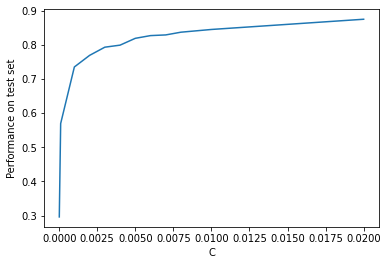

In [ ]:
## Applying Logistic Regression ##

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

time_b=time.time()
#Trying to determine the optimal value of C (regularization factor)
#C_values = np.logspace(-3, -1., 10) # smaller C = stronger regularization
C_values = np.array([0.00001,0.0001,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02],dtype=float)
C_perf = []
# print("Regularization strengths:", C_values)
for C in C_values:  
  model = LogisticRegression(C=C, random_state=0)
  model.fit(X_train, Y_train)  
  test_pred = model.predict(X_test)
  C_perf.append((test_pred == Y_test).mean())

# plt.xlabel('C')
# plt.ylabel('Performance on test set')
# plt.plot(C_values, C_perf)
'''
LR_model = LogisticRegression(max_iter = 1000, random_state=0)
LR_model.fit(X_train, Y_train)

LR_predict = LR_model.predict(X_test)
LR_accuracy = (LR_predict == Y_test).mean()
print("Accuracy of LR model = ", LR_accuracy)
'''
time_e = time.time()
print('Time elapsed:',time_e-time_b,'s')

[0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296, 0.296]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


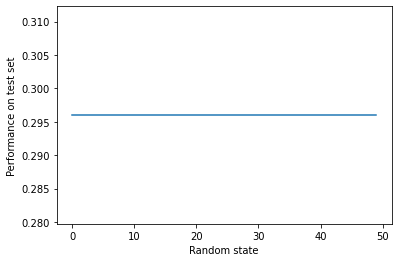

In [ ]:
#Trying to determine the optimal value of random state

from sklearn.linear_model import LogisticRegression

a_list = list(range(0, 50))
C_performance = []
random_state = []
#print(a_list)

for i in range(0,50,1):  
  model = LogisticRegression(C=0.00001, random_state=i)
  model.fit(X_train, Y_train)  
  test_pred = model.predict(X_test)
  C_performance.append((test_pred == Y_test).mean())
  random_state.append(i)

# print(C_performance)
# print(random_state)

# plt.xlabel('Random state')
# plt.ylabel('Performance on test set')
# plt.plot(random_state, C_performance)

Applying Neural Network Classifier

In [ ]:
## Applying the NN ##
from sklearn.neural_network import MLPClassifier

time_b=time.time()
#Can be experiment with different activation functions, and other parameters
#clf = MLPClassifier(hidden_layer_sizes = 2, activation = 'logistic', slover = 'sgd', learning_rate = 'adaptive')
#clf = MLPClassifier()
clf = MLPClassifier(random_state=1, max_iter=3000)
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=100, random_state=1)
clf.fit(X_train,Y_train)

predictions = clf.predict(X_test)

accuracy = (predictions == Y_test).mean()
print(accuracy)

#Predicting the o/p for the test.csv dataset
predict_test = clf.predict(test_X)
print(predict_test)
time_e = time.time()
print('Time elapsed:',time_e-time_b,'s')
'''
- For direct MLPClassifier without any argument, at test = 0.25 the output was 90.4 %
- For same direct MLP at test 0.1 we have 93%
- For (random_state=1, max_iter=3000) we are getting the accuracy of the 92.8%
'''

0.91
['science' 'science' 'science' ... 'anime' 'anime' 'anime']
Time elapsed: 17.851667881011963 s


'\n- For direct MLPClassifier without any argument, at test = 0.25 the output was 90.4 %\n- For same direct MLP at test 0.1 we have 93%\n- For (random_state=1, max_iter=3000) we are getting the accuracy of the 92.8%\n'

SVM with SGD

In [ ]:
# SVM with SGD #

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

time_b=time.time()
#sgd = make_pipeline(StandardScaler(with_mean=False), SGDClassifier())
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)

predictions = sgd.predict(X_test)

accuracy = (predictions == Y_test).mean()
print(accuracy)
time_e = time.time()
print('Time elapsed:',time_e-time_b,'s')

0.88
Time elapsed: 0.0360569953918457 s


In [ ]:
#Storing the results in excel sheet

import pandas as pd
from google.colab import files

df2 = pd.DataFrame(predict_test,test_id, columns = ['subreddit'])       #Storing the predicted results in the panda dataframe
print(df2)  

df2.to_csv('submission.csv')                                           #Storing panda dataframe into .csv file
files.download('submission.csv')                                       #Downloading the csv file

     subreddit
id            
0      science
1      science
2      science
3      science
4      science
...        ...
1373     anime
1374     anime
1375     anime
1376     anime
1377     anime

[1378 rows x 1 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Scikit Bernoulli Naive Bayes vs Bernoulli Naive Bayes model built from scratch.

In [ ]:
#Scikit Based Naive Bayes Text Classification

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
X_BNBtr, X_BNBtst, y_BNBtr, y_BNBtst = train_test_split(df['body'], df['subreddit'],train_size=0.75,random_state=42,shuffle=True)  
bnb_vect = CountVectorizer(binary=True, max_features=3000)       #Binary representation of input text data
X_BNBtr = bnb_vect.fit_transform(X_BNBtr)     #Fit data and transform
#print(X_BNBtr)
X_BNBtst = bnb_vect.transform(X_BNBtst)       #Standardize data by Centering and Scaling
#print(X_BNBtst)
bnb = BernoulliNB()
bnb.fit(X_BNBtr, y_BNBtr)                     #Model Fit function
y_BNBpred = bnb.predict(X_BNBtst)             #Predict Function
#print('\n',np.size(y_BNBpred))
bnb_accuracy = (y_BNBpred == y_BNBtst).mean() #Accuracy Evaluation
print('Accuracy :',bnb_accuracy*100,'%')
#print(X_BNBtr)

Accuracy : 84.0 %


Spot-Check Algorithms
- It is used to do Kfold on all Sci-Kit Models, and running it will give the accuracy and time period to implement k-fold for a particular model.

In [ ]:
# Spot-Check Algorithms

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

classifiers = []
classifiers.append(('LR', LogisticRegression()))
classifiers.append(('NN', MLPClassifier()))
classifiers.append(('DT', DecisionTreeClassifier()))
#classifiers.append(('NB', BernoulliNB()))
classifiers.append(('SVM', SVC()))
classifiers.append(('RF', RandomForestClassifier()))

#Testing accuracy of K-fold validation on above models
results = []
names = []
for name, model in classifiers:
  time_b=time.time()
  kfold = KFold(n_splits = 10,shuffle=True,random_state = 42)
  # cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') #Enable CountVectorizer(binary=True)
  # cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')   #Enable CountVectorizer(binary=False)
  cv_result = cross_val_score(model, vectors_train_idf, Y_train_t, cv=kfold, scoring='accuracy')   #Tf-IDF Vectorizer
  results.append(cv_result)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_result.mean(), cv_result.std())
  print(msg)
  time_e = time.time()
  print('\nTime elapsed:',time_e-time_b,'s\n')  

LR: 0.914609 (0.011478)

Time elapsed: 4.664604663848877 s

NN: 0.911280 (0.013646)

Time elapsed: 115.32775378227234 s

DT: 0.712465 (0.033608)

Time elapsed: 1.6163709163665771 s

SVM: 0.913955 (0.011646)

Time elapsed: 16.069931507110596 s

RF: 0.874582 (0.021047)

Time elapsed: 8.62175965309143 s



In [ ]:
#Plotting confusion matrix for LR model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

LR_model = LogisticRegression(max_iter = 1000, random_state=0)
LR_model.fit(X_train, Y_train)
LR_score = LR_model.score(X_test,Y_test)
print("Accuracy from score method of LR model = ", LR_score)
LR_predict = LR_model.predict(X_test)
LR_accuracy = (LR_predict == Y_test).mean()
print("Accuracy of LR model = ", LR_accuracy)    
print("\nConfusion Matrix of LR model\n",confusion_matrix(Y_test, LR_predict))

Accuracy from score method of LR model =  0.894
Accuracy of LR model =  0.894

Confusion Matrix of LR model
 [[ 83   0   3   6   6]
 [  0  98   2   2   1]
 [  1   6  84   5   1]
 [  3   0   2 101   5]
 [  2   1   2   5  81]]


---
# **CODE ENDS**
---